In [4]:
def read_data(filename, encoding='cp949'):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data


def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)


data = read_data('c:\\pytest\\ratings.txt', encoding='cp949')


In [2]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()
morphed_data = ''
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+"\t" + \
            joined_data_each+"\t"+data_each[2]+"\n"
write_data(morphed_data, 'c:\\pytest\\ratings_morphed.txt', encoding='cp949')


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


100%|██████████| 200000/200000 [01:54<00:00, 1743.68it/s]


In [5]:
data = read_data('c:\\pytest\\ratings_morphed.txt', encoding='cp949')
print(len(data))
print(len(data[0]))
print(data[0])


197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [6]:
import random
import math
import numpy as np
random.shuffle(data)

part_num = math.floor(len(data) * 1/3)
data = data[:part_num]
print(len(data))


65853


In [5]:
data

[['9432498', '동안 감금 영화', '1'],
 ['1501030', '재미 잇 드라마', '1'],
 ['3655792', '언어적 허영심 무교양 육체 자본 연예인 이상', '0'],
 ['8692354', '믿 아놀드 형님 영화', '1'],
 ['2881722', '제목 그렇 별 재미 없', '0'],
 ['702690', '자극적 때로 이런 잔잔 함 좋', '1'],
 ['9735405',
  '원래 평점 잘 안남기 남기 쓰레기 10점 주 알바 어찌 이리 영상미 없 스토리 없 재미 없 애 조금 벗기 하 류 중의 갑자기 좀비 탄생 마구 죽이 황당',
  '0'],
 ['9677819', '다운 받 리뷰 후딱', '0'],
 ['8583597', '보 때 손 땀 흔 근 명작 생각', '1'],
 ['10061910', '평점 너무 낮 보 말 고민하 이제야 보 은근 재미있 살 저렇 기억 남 사랑 빠지 순간 있 하', '1'],
 ['739804', '대부분 사람 이 영화 놀랍 완성도 잘 모르 있', '1'],
 ['4415988', '그냥 액션 영화', '0'],
 ['9839233', '별 주 싫 진짜 걍 지루 재미없 돈 아깝', '0'],
 ['5655510', '완전 재밌 ㅎㅎ ㅎㅎ ㅎ 이유 연기 짱 잘 하 꺄 아악 신고', '1'],
 ['8690782', '채플린 감사', '1'],
 ['1511856', '아이 누구 다른 만들 것', '0'],
 ['7917074', '괜찮', '1'],
 ['4038834', '마이클 마이어 가 물려주 기세 할로윈 탈 지멋 스토리 엉망진창', '0'],
 ['4229713', '펭귄 완전 웃기 ㅋㅋ ㅋ', '1'],
 ['8763123', '아들 아주 좋아하 신나 하', '1'],
 ['9283351', '내 나이 수지 끌리 아저씨 집 라면 먹 ㅎㅎ', '1'],
 ['9684523', '용 비서 드라마 청량제 귀 요 미 러브 라인 출연 분 좀 늘리', '1'],
 ['5520222', '지진희 좋아하 

In [7]:
from sklearn.model_selection import train_test_split
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(
    data_text, data_senti, stratify=data_senti)


In [8]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print("train_data_senti_freq:", train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print("test_data_senti_freq:", test_data_senti_freq)


train_data_senti_freq: Counter({'0': 24756, '1': 24633})
test_data_senti_freq: Counter({'0': 8253, '1': 8211})


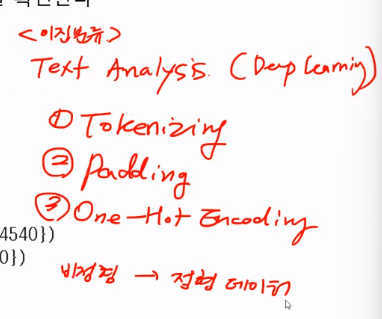

In [9]:
import numpy as np
text_len = [len(line.split(' ')) for line in train_data_text]
print("최소 길이:", min(text_len))
print("최대 길이:", max(text_len))
print("평균 길이:", round(np.mean(text_len),1))
print("중위수 길이:", round(np.median(text_len),1))
print("구간별 최대 길이:", np.percentile(text_len, [0,25,50,75,90,95,99,100]))
print("최소 길이 문장:", train_data_text[np.argmin(text_len)])
print("최대 길이 문장:", train_data_text[np.argmax(text_len)])

최소 길이: 1
최대 길이: 70
평균 길이: 8.8
중위수 길이: 7.0
구간별 최대 길이: [ 1.  4.  7. 11. 18. 26. 35. 70.]
최소 길이 문장: 과하
최대 길이 문장: ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ


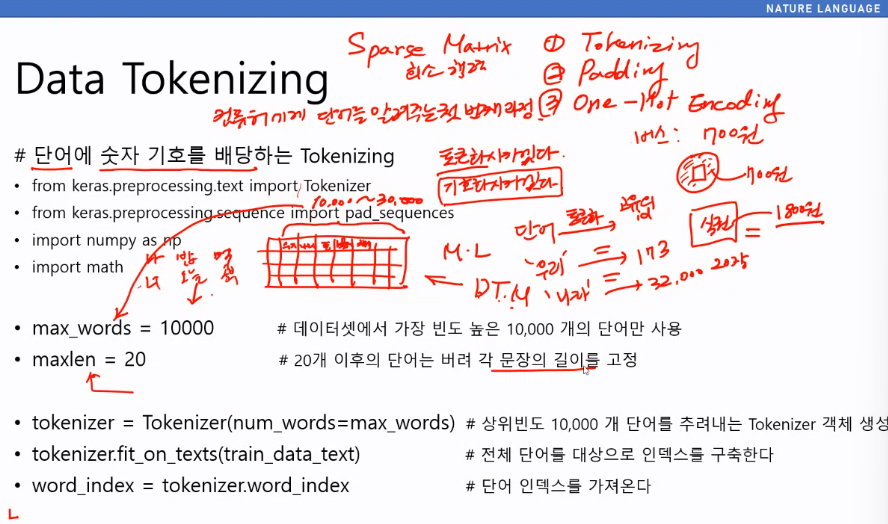

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words= 10000
maxlen= 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index= tokenizer.word_index

train에서 fit_on_texts를 하고 test에는 fit_on_texts를 하면 안된다.
단어 순서도 빈도도 단어 종류도 다르기 때문에 
다른 단어라도 같은 숫자로 매핑될 수 있다.
scaler와 같은 이유이다.


In [11]:
import tensorflow.keras.preprocessing.sequence
dir(tensorflow.keras.preprocessing.sequence)

from keras_preprocessing.sequence import pad_sequences

In [26]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))

from itertools import islice
dict(islice(word_index.items(), 0, 20))

# print('word_index: ', word_index)


전체에서 21880개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


{'영화': 1,
 '하': 2,
 '보': 3,
 '없': 4,
 'ㅋㅋ': 5,
 '재미있': 6,
 '좋': 7,
 '너무': 8,
 '되': 9,
 '있': 10,
 '정말': 11,
 '같': 12,
 '진짜': 13,
 '만들': 14,
 '말': 15,
 '나오': 16,
 '연기': 17,
 '최고': 18,
 '평점': 19,
 'ㅋ': 20}

In [29]:
dict(list(word_index.items())[:3])

{'영화': 1, '하': 2, '보': 3}

In [32]:
{k: v for i, (k, v) in enumerate(word_index.items()) if i < 5}


{'영화': 1, '하': 2, '보': 3, '없': 4, 'ㅋㅋ': 5}

In [13]:
data = tokenizer.texts_to_sequences(train_data_text)
print('data 0:', data[0])
print('texts 0:', train_data_text[0])
print('data 100:', data[100])
print('texts 100:', train_data_text[100])
print('data 3000:', data[3000])
print('texts 3000:', train_data_text[3000])

data 0: [443, 723, 177, 1, 3873, 4]
texts 0: 존 노 잼 영화 서사 없
data 100: [4881, 1341, 265, 197, 3, 4]
texts 100: 김수미 할머니 빼 전혀 보 없
data 3000: [6247, 8, 1479, 987, 2226, 20, 861]
texts 3000: 진국 너무 특수 효과 공포감 다 사라지


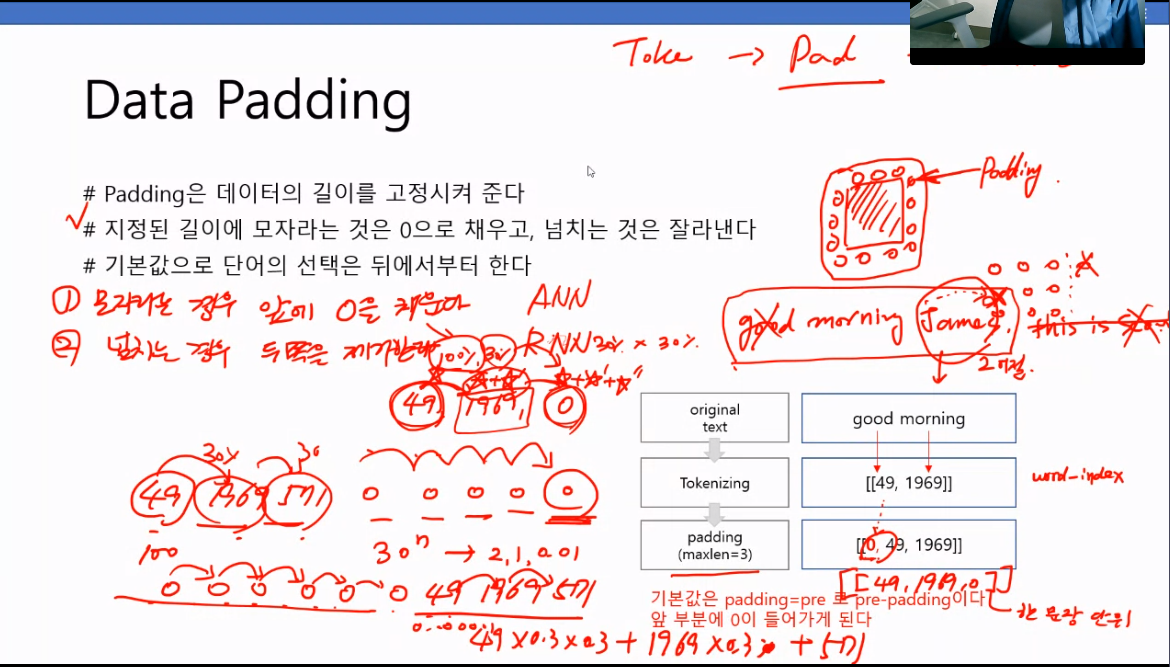

In [14]:
data = pad_sequences(data, maxlen=maxlen) 
print('data:', data)
print('data 0:', data[0])
print('data 0의길이:', len(data[0]))

data: [[   0    0    0 ...    1 3873    4]
 [   0    0    0 ...    9  480  204]
 [   0    0    0 ... 2753  160 1269]
 ...
 [   0    0    0 ...    0  153 2244]
 [5208 1010   18 ...    3 1800   21]
 [   0    0    0 ... 1527    4  374]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  443  723  177    1 3873    4]
data 0의길이: 20


In [38]:
data[2]

array([ 146,  387, 2277, 6066,  104, 8134, 2277, 2450,    2, 6943,  623,
        337,   15,    2,   22,  380, 1280, 3642,  187, 5427])

In [42]:
train_data_text[2]

'만약 동안 김치 먹 몸 생기 부작용 알리 줄 뒤 김치 해로 울 식품 김치 보이콧 운동 하 햄버거 몸 나쁘 말 하 이 다큐 방법 마인드 자체 삐뚤어지'

In [51]:
pad_sequences([data[2]]) 

array([[ 146,  387, 2277, 6066,  104, 8134, 2277, 2450,    2, 6943,  623,
         337,   15,    2,   22,  380, 1280, 3642,  187, 5427]])

In [48]:
pad_sequences([data[2]], maxlen=5, truncating='post') 

array([[ 146,  387, 2277, 6066,  104]])

In [47]:
pad_sequences([data[2]], maxlen=5, truncating='pre') 

array([[ 380, 1280, 3642,  187, 5427]])

In [52]:
pad_sequences([data[2]], maxlen=40)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  146,  387,
        2277, 6066,  104, 8134, 2277, 2450,    2, 6943,  623,  337,   15,
           2,   22,  380, 1280, 3642,  187, 5427]])

In [53]:
pad_sequences([data[2]], maxlen=40, padding='pre')

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  146,  387,
        2277, 6066,  104, 8134, 2277, 2450,    2, 6943,  623,  337,   15,
           2,   22,  380, 1280, 3642,  187, 5427]])

In [54]:
pad_sequences([data[2]], maxlen=40, padding='post')

array([[ 146,  387, 2277, 6066,  104, 8134, 2277, 2450,    2, 6943,  623,
         337,   15,    2,   22,  380, 1280, 3642,  187, 5427,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])

In [15]:
sample = [[5, 6, 7], [8, 9, 10]]
arra = np.zeros((len(sample), 10+1))
for i, s in enumerate(sample):
    arra[i, s] = 1

arra


array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [21]:
len(data)

49389

In [28]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq.astype('int')] = 1
    return results

data = to_one_hot(data, max_words)
# labels = np.asarray(train_data_senti).astype('float32')


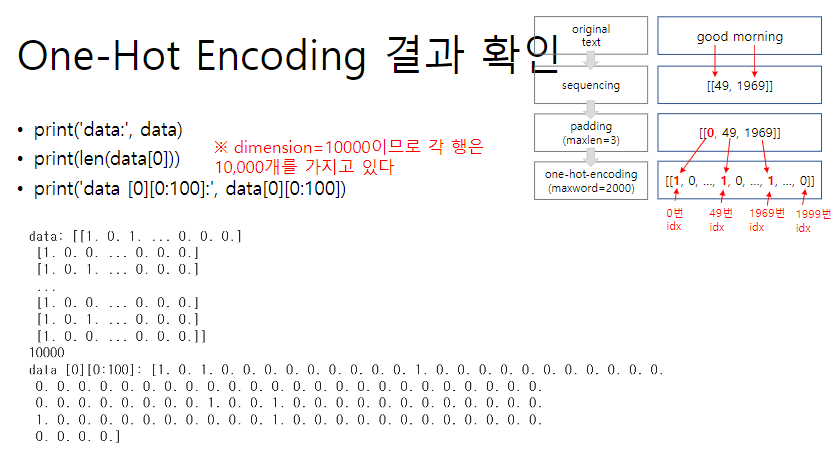

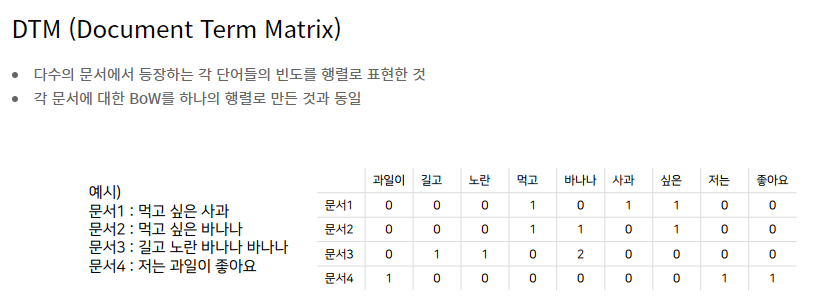

원핫인코딩으로 변하면
1. 빈도 정보와 (한 문장 내 여러번 나온 단어라도 1로 바뀌니까) 원핫인코딩은 dtm과는 달리 빈도정보를 기록안한다.
2. 단어 순서의 정보가 소실된다. (단어 순서는 기록되지 않는다. dtm은 순서가 기록되지 않는다.)

## np.array np.asarray

In [29]:
np.array(train_data_senti)

array(['0', '1', '1', ..., '1', '0', '0'], dtype='<U1')

In [30]:
np.asarray(train_data_senti)

array(['0', '1', '1', ..., '1', '0', '0'], dtype='<U1')

In [31]:
data

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [32]:
len(data[0])

10000

In [33]:
data[0][:50]

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
train_data_text[:2]

['존 노 잼 영화 서사 없', '원래 웬만하 다 끝나 몰아 보 데이 우연히 나 너무 재밌 본방 사수 되 네 ㅡ']

In [35]:
data,type(data)

(array([[1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.]]),
 numpy.ndarray)

In [36]:
data.shape

(49389, 10000)

In [37]:
data.ndim

2

In [38]:
labels.ndim

1

In [39]:
labels.shape

(49389,)

In [40]:
labels[:10]

array([0., 1., 1., 0., 1., 1., 1., 0., 1., 1.], dtype=float32)

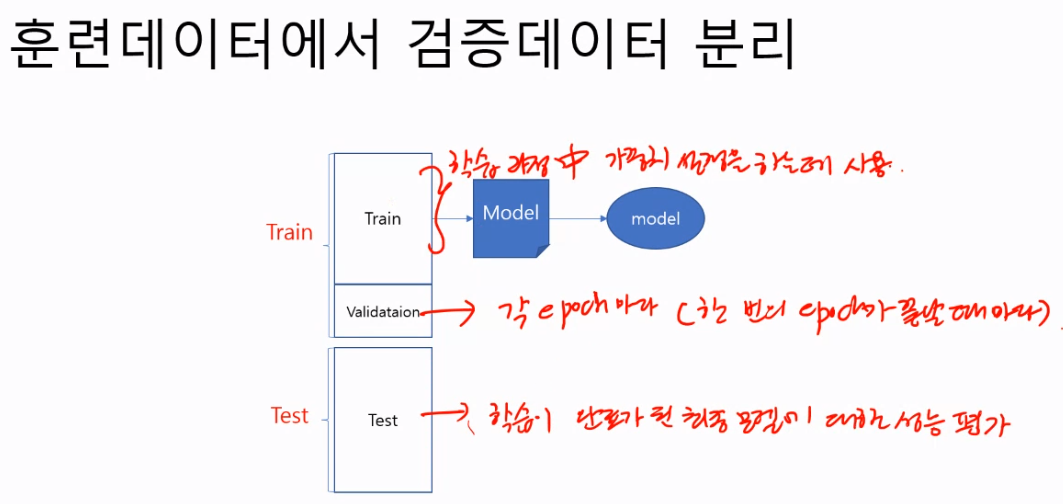

In [41]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)
x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]


In [42]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [64]:
history = model.fit(x_train, y_train, epochs=5,
                    batch_size=32, validation_data=(x_val, y_val))


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [65]:
history_dict = history.history


In [46]:
%cd c:/pytest

c:\projects


In [47]:
model.save('test_binary_model.h5')

In [66]:
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [67]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [68]:
print('Train accuracy of each epoch:', np.round(acc, 3))
print('Validation accuracy of each epoch:', np.round(val_acc, 3))


Train accuracy of each epoch: [0.498 0.498 0.496 0.502 0.502]
Validation accuracy of each epoch: [0.502 0.502 0.502 0.498 0.502]


In [51]:
print('Train accuracy of each epoch:', np.round(acc, 3))
print('Validation accuracy of each epoch:', np.round(val_acc, 3))


Train accuracy of each epoch: [0.499 0.498 0.499 0.498 0.498]
Validation accuracy of each epoch: [0.498 0.498 0.498 0.502 0.502]


range(1, 6)


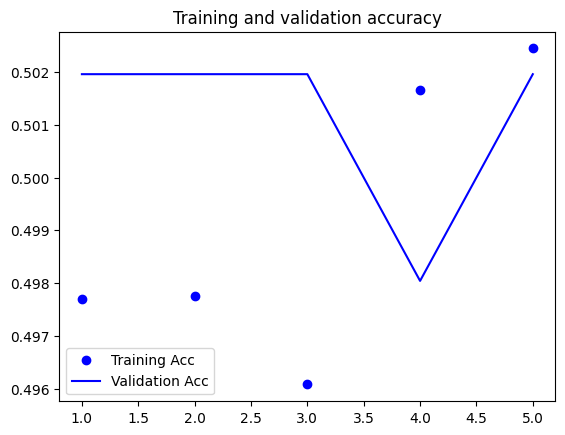

In [69]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc) + 1)
print(epochs)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

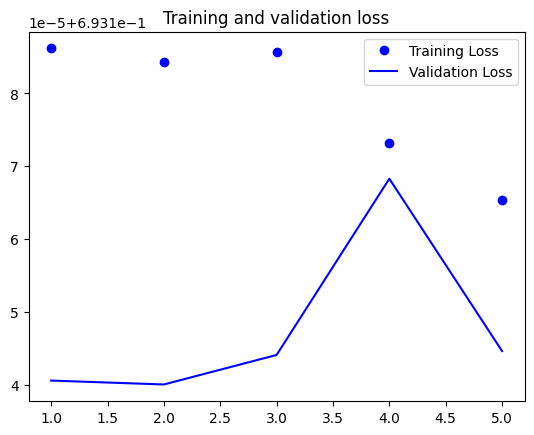

In [70]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [54]:
import os
from keras.models import load_model
import pickle
filepath = 'c:\\pytest\\'
os.chdir(filepath)
print("Current Directory:", os.getcwd())
loaded_model = load_model('test_binary_model.h5')
print("model loaded:", loaded_model)
with open('text_binary_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


Current Directory: c:\pytest
model loaded: <keras.engine.sequential.Sequential object at 0x0000017C7C3A6888>


In [55]:
print(test_data_text[:3])
print(test_data_senti[:3])


['아름답', '원 포 더 머니 아이 포 더 쇼', '다 보 시간 낭비 없 최악 영화']
['1', '1', '0']


In [56]:
data = loaded_tokenizer.texts_to_sequences(test_data_text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)
y_test = np.asarray(test_data_senti).astype('float32')


In [57]:
test_eval = loaded_model.evaluate(x_test, y_test)


515/515 [==============================] - 3s 6ms/step - loss: 0.6929 - acc: 0.5009


In [58]:
print('prediction model loss & acc:', test_eval)


prediction model loss & acc: [0.6928815245628357, 0.5009110569953918]


In [59]:
test_results = loaded_model.predict(x_test)
text_result = ["긍정" if test_result >
               0.5 else "부정" for test_result in test_results]
text_result[:10]


515/515 [==============================] - 3s 5ms/step


['부정', '부정', '부정', '부정', '부정', '부정', '부정', '부정', '부정', '부정']

In [77]:
import rhinoMorph
text = ["재미있게 잘 봤습니다"]
rn = rhinoMorph.startRhino()
text = [rhinoMorph.onlyMorph_list(rn, sentence, pos=[
                                  'NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소분석결과:', text)
x_test = loaded_tokenizer.texts_to_matrix(text, mode='binary')
prediction = loaded_model.predict(x_test)
print("Result:", prediction)


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
형태소분석결과: [['재미있', '잘', '보']]
1/1 [==============================] - 0s 23ms/step
Result: [[0.49434257]]


In [81]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]]


In [80]:
if prediction[0][0] >= 0.5:
    print(f"긍정일 확률이 {prediction[0][0]*100:.2f}% 입니다.")
else:
    print(f"부정일 확률이 {prediction[0][0]*100:.2f}% 입니다.")

부정일 확률이 49.43% 입니다.


In [61]:
print(prediction)
print((prediction>0.5)[0][0])

[[0.49434257]]
False


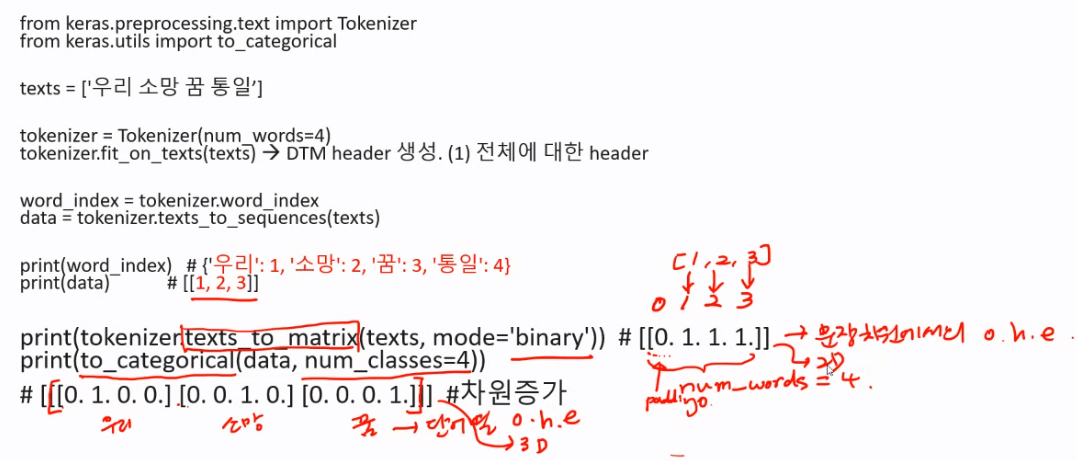

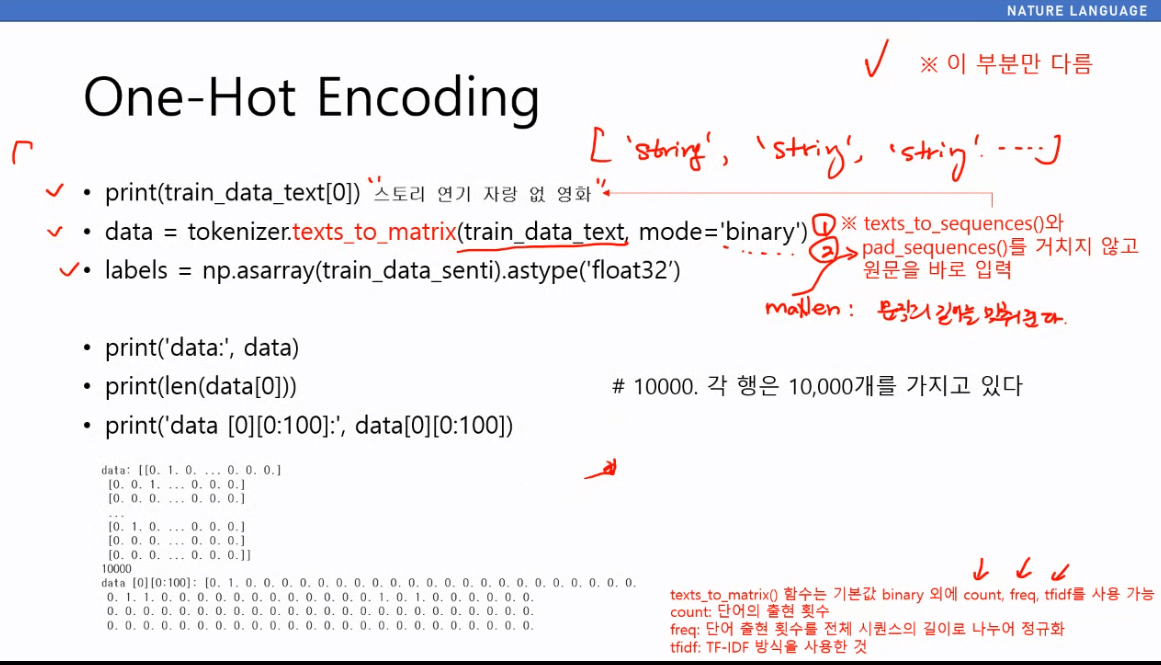

In [86]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
texts = ['우리 소망 꿈 통일']
tokenizer = Tokenizer(num_words=4)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
data = tokenizer.texts_to_sequences(texts)
print(word_index)   # {'우리': 1, '소망': 2, '꿈': 3, '통일': 4}
print(data)            # [[1, 2, 3]]
print(tokenizer.texts_to_matrix(texts, mode='binary'))
# [[0. 1. 1. 1.]] [[[0. 1. 0. 0.] [0. 0. 1. 0.] [0. 0. 0. 1.]]]  #차원증가
print(to_categorical(data, num_classes=4))


{'우리': 1, '소망': 2, '꿈': 3, '통일': 4}
[[1, 2, 3]]
[[0. 1. 1. 1.]]
[[[0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]


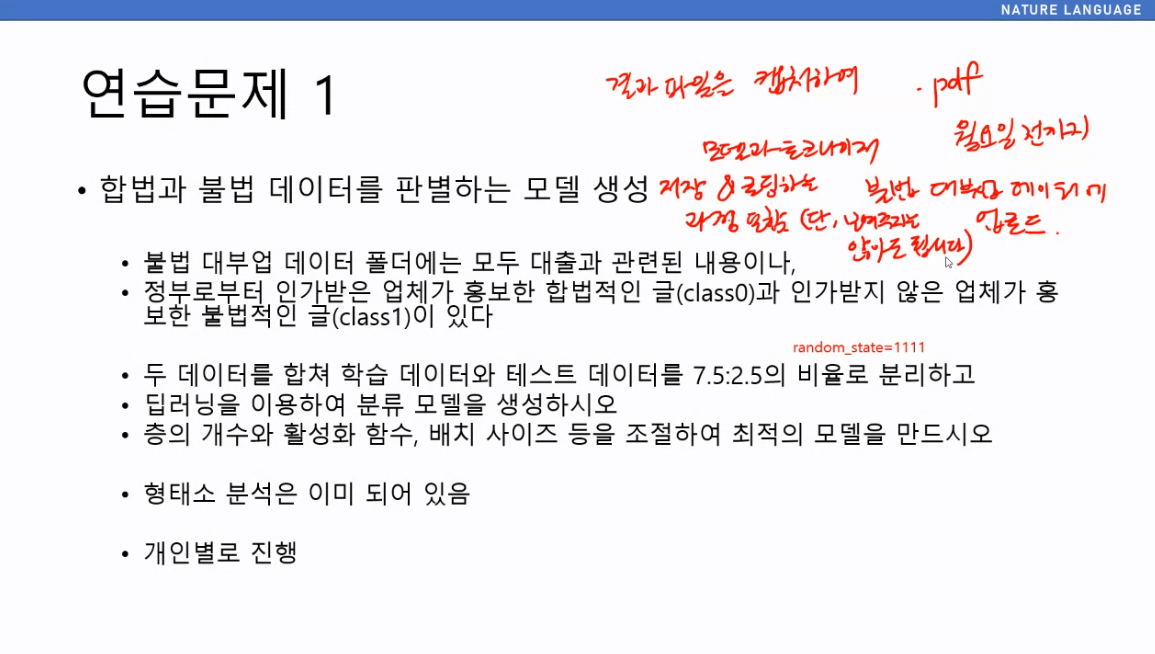

In [1]:
import pandas as pd
from glob import glob

In [2]:
data = pd.DataFrame()
for i in glob(r'C:\pytest\불법 대부업 데이터\*'):
    try:
        data = pd.concat([data, pd.read_csv(i, encoding='cp949')], axis=0)
    except:
        data = pd.read_csv(i, encoding='cp949')
data # class0:합법 class1:불법
data = data.reset_index()
data.drop('index', axis=1, inplace=True)
data


Content   Label
0     그라나다 할부 조건 시간 전국 어디 중고차 할부 가능 여부 서비스 상담 신청 양식 ...  class0
1     광고 광고 올해 통신 인터넷 보이스 피싱 메모리 해킹 사기 피해 건수 피해액 최민희...  class0
2     춘천 연합뉴스 이해 기자 강원도 교육청 올해 보급 예정 교과서 전자 보이스 피싱 사...  class0
3                                            조선족 보이스 피싱  class0
4                                            조선족 보이스 피싱  class0
...                                                 ...     ...
4393                                  연체 당일 소액 전마 전국 출장  class1
4394                 휴대폰 소액 결제 문의 입금 통신사 지급 미납 정책 급전 문의  class1
4395  뉴스 기사 직장인 서류 케이블 방송 신용 대출 광고 대출 금액 상환금 직장인 소득 ...  class1
4396           과다 조회 과다 대출 대출 누구 신용 등급 승인 보장 무직자 대출 작업대  class1
4397  휴대폰 소액 결제 서비스 문의 입금 발신 가능 문의 통신사 지급 미납 정책 급전 문...  class1

[4398 rows x 2 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Label_Encoder']=l.fit_transform(data.Label)

In [10]:
data

Content   Label  Label_Encoder
0     그라나다 할부 조건 시간 전국 어디 중고차 할부 가능 여부 서비스 상담 신청 양식 ...  class0              0
1     광고 광고 올해 통신 인터넷 보이스 피싱 메모리 해킹 사기 피해 건수 피해액 최민희...  class0              0
2     춘천 연합뉴스 이해 기자 강원도 교육청 올해 보급 예정 교과서 전자 보이스 피싱 사...  class0              0
3                                            조선족 보이스 피싱  class0              0
4                                            조선족 보이스 피싱  class0              0
...                                                 ...     ...            ...
4393                                  연체 당일 소액 전마 전국 출장  class1              1
4394                 휴대폰 소액 결제 문의 입금 통신사 지급 미납 정책 급전 문의  class1              1
4395  뉴스 기사 직장인 서류 케이블 방송 신용 대출 광고 대출 금액 상환금 직장인 소득 ...  class1              1
4396           과다 조회 과다 대출 대출 누구 신용 등급 승인 보장 무직자 대출 작업대  class1              1
4397  휴대폰 소액 결제 서비스 문의 입금 발신 가능 문의 통신사 지급 미납 정책 급전 문...  class1              1

[4398 rows x 3 columns]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Content'], data['Label_Encoder'], train_size=.75, random_state=1111)
# X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, train_size=.9, random_state=1111)

In [12]:
import numpy as np
text_len = [len(line.split(' ')) for line in X_train]
print("최소 길이:", min(text_len))
print("최대 길이:", max(text_len))
print("평균 길이:", round(np.mean(text_len), 1))
print("중위수 길이:", round(np.median(text_len), 1))
print("구간별 최대 길이:", np.percentile(text_len, [0, 25, 50, 75, 90, 95, 99, 100]))


최소 길이: 2
최대 길이: 20
평균 길이: 12.7
중위수 길이: 11.0
구간별 최대 길이: [ 2.  8. 11. 20. 20. 20. 20. 20.]


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
maxlen = 35

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(np.array(X_train))
word_index = tokenizer.word_index


In [14]:
X_train_data = tokenizer.texts_to_sequences(np.array(X_train))
X_test_data = tokenizer.texts_to_sequences(np.array(X_test))
print('data 0:', X_train_data[900])
print('texts 0:', X_train.iloc[900])
print('test_data 0:', X_test_data[300])
print('test_texts 0:', X_test.iloc[300])

data 0: [3, 188, 1429, 1094, 2213, 752, 430, 2, 4, 291, 57, 3, 346, 70, 57, 481, 2214, 671, 2215, 2216]
texts 0: 대출 사기 가운데 작업대 출사 기승 주의 신용 등급 소득 금융 대출 일반 서민 금융 제도 이용객 추세 틈새 모방
test_data 0: [18, 1, 34, 51, 87, 2, 4, 7, 5]
test_texts 0: 한기평 보증 사채 기업 어음 신용 등급 안정 평가


In [15]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

X_train_data_to_one_hot = to_one_hot(X_train_data, max_words)
X_test_data_to_one_hot = to_one_hot(X_test_data, max_words)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,290,497
Trainable params: 1,290,497
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')
history = model.fit(X_train_data_to_one_hot, y_train, epochs=20, batch_size=32)


Epoch 1/20
104/104 [==============================] - 1s 6ms/step - loss: 0.1987 - acc: 0.9548
Epoch 2/20
104/104 [==============================] - 0s 3ms/step - loss: 0.0200 - acc: 0.9936
Epoch 3/20
104/104 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 0.9988
Epoch 4/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0017 - acc: 0.9994
Epoch 5/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0013 - acc: 0.9997
Epoch 6/20
104/104 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 0.9994
Epoch 7/20
104/104 [==============================] - 0s 4ms/step - loss: 9.1632e-04 - acc: 0.9997
Epoch 8/20
104/104 [==============================] - 0s 3ms/step - loss: 2.3819e-04 - acc: 1.0000
Epoch 9/20
104/104 [==============================] - 0s 4ms/step - loss: 1.2537e-04 - acc: 1.0000
Epoch 10/20
104/104 [==============================] - 0s 3ms/step - loss: 9.6643e-05 - acc: 1.0000
Epoch 11/20
104/104 [============

In [21]:
test_eval = model.evaluate(X_test_data_to_one_hot, y_test)
print('prediction model loss & acc:', test_eval)


35/35 [==============================] - 0s 6ms/step - loss: 0.1191 - acc: 0.9773
prediction model loss & acc: [0.11909254640340805, 0.9772727489471436]


In [76]:
import typing

a_var: str = 'hello'
a_var = 5
print(a_var)


def typing_check(b_var: str):
    print(b_var)


typing_check(6)

c_var: typing.List[int] = [1, 2, 3]
c_var.append('hi')
print(c_var)


5
6
[1, 2, 3, 'hi']


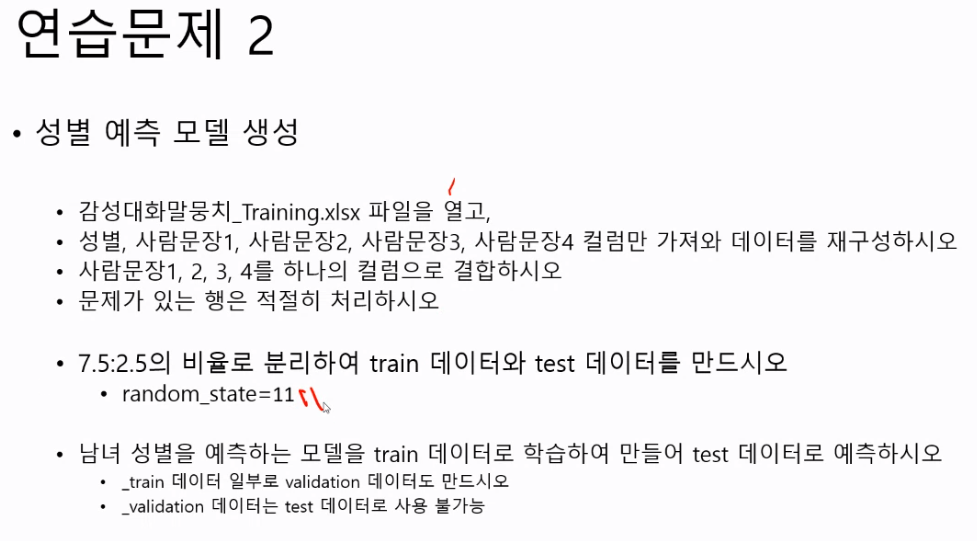

In [1]:
import pandas as pd
df = pd.read_excel('c:\\pytest\\감성대화말뭉치\\감성대화말뭉치(최종데이터)_Training.xlsx')
df = df[['성별', '사람문장1', '사람문장2', '사람문장3', '사람문장4']]


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      40879 non-null  object
 1   사람문장1   40879 non-null  object
 2   사람문장2   40879 non-null  object
 3   사람문장3   31059 non-null  object
 4   사람문장4   1472 non-null   object
dtypes: object(5)
memory usage: 1.6+ MB


In [3]:
df = df.fillna('')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      40879 non-null  object
 1   사람문장1   40879 non-null  object
 2   사람문장2   40879 non-null  object
 3   사람문장3   40879 non-null  object
 4   사람문장4   40879 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [4]:
df_combine = pd.DataFrame()
df_combine['성별'] = df['성별']
df_combine['사람문장'] = df['사람문장1'] + " "  + df['사람문장2'] + " "  + df['사람문장3'] + " "  + df['사람문장4']
df_combine


성별                                               사람문장
0      남성  아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...
1      남성  당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...
2      여성  고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...
3      남성  재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...
4      여성  빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...
...    ..                                                ...
40874  남성  같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...
40875  남성  지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어. 결과가 좋게 나와서 다...
40876  여성  엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼. 내 재능...
40877  여성  이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야. 덕분에 건강...
40878  남성  친구 관계가 너무 힘들어. 베푸는 만큼 돌아오지 않는 것 같아. 카페에 가서 대화하...

[40879 rows x 2 columns]

In [5]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()
def morphed_sentences(text):
    morphed_data = rhinoMorph.onlyMorph_list(
        rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    return ' '.join(morphed_data)

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [7]:
df_combine['형태소분리'] = df_combine.사람문장.apply(morphed_sentences)

In [8]:
df_combine

성별                                               사람문장  \
0      남성  아내가 드디어 출산하게 되어서 정말 신이 나. 아 지금 정말 신이 나. 아기가 점점...   
1      남성  당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. 건강할 때 ...   
2      여성  고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...   
3      남성  재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. ...   
4      여성  빚을 드디어 다 갚게 되어서 이제야 안도감이 들어. 빚도 다 갚았으니 당분간은 아무...   
...    ..                                                ...   
40874  남성  같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...   
40875  남성  지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어. 결과가 좋게 나와서 다...   
40876  여성  엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼. 내 재능...   
40877  여성  이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야. 덕분에 건강...   
40878  남성  친구 관계가 너무 힘들어. 베푸는 만큼 돌아오지 않는 것 같아. 카페에 가서 대화하...   

                                                   형태소분리  
0      아내 드디어 출산 되 정말 신 나 아 지금 정말 신 나 아기 점점 크 벌써 기대 되...  
1      당뇨 합병증 약이 가지 넘어가 스트레스 건강 때 관리 좀 잘 하 하 생각 들 약 잘...  
2      고등학교 올라오 중학교 때 수업 갑자기 어렵 당황 아직 학기 초인 수업 잘 따라가 ...  
3      재취업 되 받 되 첫 월급 오 가족 외식 하 예정 너무 행복 퇴직 후 다시 돈 못 ...  
4            빚 드디어 다 갚 되 이제야 안도감 들 빚 다 갚 당분간 아무 생각 안 하 살  
...                                                  ...  
40874  같이 살 친구 애완견 데리 대부분 돌보 있 주인 혼란 아예 떠넘기 같 친구 이야기 ...  
40875                 지난주 건강검진 결과 나오 정상 결과 나오 결과 좋 나오 다행  
40876  엄마 꿈 작가 응원 하 지금 안 그래 너무 슬프 재능 남 월등 하 취업 안정적 살 ...  
40877  이렇게 좋 운동 시설 경로 우대 운동 있 참 행운 덕분 건강 챙기 있 너무 좋 안마...  
40878  친구 관계 너무 힘들 베 푸 돌아오 같 카페 가 대화 같이 술 마시 이야기 같 직접...  

[40879 rows x 3 columns]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_combine['형태소분리'], df_combine['성별'], train_size=.75, random_state=1111)
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, train_size=.9, random_state=1111)


In [10]:
import numpy as np
text_len = [len(line.split(' ')) for line in X_train_train]
print("최소 길이:", min(text_len))
print("최대 길이:", max(text_len))
print("평균 길이:", round(np.mean(text_len), 1))
print("중위수 길이:", round(np.median(text_len), 1))
print("구간별 최대 길이:", np.percentile(text_len, [0, 25, 50, 75, 90, 95, 99, 100]))


최소 길이: 4
최대 길이: 74
평균 길이: 22.0
중위수 길이: 22.0
구간별 최대 길이: [ 4. 17. 22. 26. 31. 33. 40. 74.]


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
maxlen = 30

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(np.array(X_train_train))
word_index = tokenizer.word_index


In [12]:
X_train_train_data = tokenizer.texts_to_sequences(np.array(X_train_train))
X_val_data = tokenizer.texts_to_sequences(np.array(X_val))
X_test_data = tokenizer.texts_to_sequences(np.array(X_test))
print('data 0:', X_train_train_data[900])
print('texts 0:', X_train_train.iloc[900])
print('test_data 0:', X_test_data[300])
print('test_texts 0:', X_test.iloc[300])

data 0: [2, 1849, 230, 67, 6970, 1211, 118, 35, 2, 242, 17, 189, 28, 367, 4, 3418, 1, 753, 975, 331, 1448, 793, 6]
texts 0: 친구 제주도 놀 엄마 흔쾌 허락 기쁘 응 친구 처음 가 여행 많이 기대 되 종이 하 써 내리 계획 철저히 세우 있
test_data 0: [106, 2, 132, 1633, 48, 69, 315, 787, 62, 164, 12, 106, 2, 132, 4, 328, 385, 594, 13, 156]
test_texts 0: 여자 친구 잘못 빌 집 앞 기다리 끝내 나오 상처 받 여자 친구 잘못 되 행동 서운 기회 더 전화


In [13]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

X_train_train_data_to_one_hot = to_one_hot(X_train_train_data, max_words)
X_val_data_to_one_hot = to_one_hot(X_val_data, max_words)
X_test_data_to_one_hot = to_one_hot(X_test_data, max_words)


In [14]:
y_train_train_trans = y_train_train.replace('남성', 1).replace('여성', 0)
y_val_trans = y_val.replace('남성', 1).replace('여성', 0)
y_test_trans = y_test.replace('남성', 1).replace('여성', 0)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')
history = model.fit(X_train_train_data_to_one_hot, y_train_train_trans,
                    validation_data=(X_val_data_to_one_hot, y_val_trans), epochs=10, batch_size=1)


Epoch 1/10
27593/27593 [==============================] - 238s 9ms/step - loss: 0.6033 - acc: 0.6416 - val_loss: 0.5873 - val_acc: 0.6533
Epoch 2/10
27593/27593 [==============================] - 237s 9ms/step - loss: 0.5117 - acc: 0.7311 - val_loss: 0.6027 - val_acc: 0.6628
Epoch 3/10
27593/27593 [==============================] - 239s 9ms/step - loss: 0.3806 - acc: 0.8249 - val_loss: 0.6495 - val_acc: 0.6696
Epoch 4/10
27593/27593 [==============================] - 238s 9ms/step - loss: 0.2494 - acc: 0.8953 - val_loss: 0.8864 - val_acc: 0.6729
Epoch 5/10
27593/27593 [==============================] - 243s 9ms/step - loss: 0.1472 - acc: 0.9429 - val_loss: 1.1323 - val_acc: 0.6657
Epoch 6/10
27593/27593 [==============================] - 247s 9ms/step - loss: 0.0820 - acc: 0.9692 - val_loss: 1.6839 - val_acc: 0.6784
Epoch 7/10
27593/27593 [==============================] - 256s 9ms/step - loss: 0.0459 - acc: 0.9832 - val_loss: 2.3015 - val_acc: 0.6657
Epoch 8/10
27593/27593 [==========

In [17]:
test_eval = model.evaluate(X_test_data_to_one_hot, y_test_trans)
print('prediction model loss & acc:', test_eval)


320/320 [==============================] - 1s 4ms/step - loss: 4.1175 - acc: 0.6563
prediction model loss & acc: [4.117530345916748, 0.656262218952179]


In [ ]:
# ic, ef

In [18]:
model.save('c:\\projects\\problem_2.h5')

In [19]:
import pickle
with open('c:\\projects\\problem_2_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
